In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
# ignore warnings using the warnings module.
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
# Define Graphing Function
# It takes a dataframe with stock data (dataframe must contain Date and Close columns), 
# a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1: Use yfinance to Extract Stock Data

In [9]:
# Using the yfinance Library to Extract Stock Data
tesla = yf.Ticker("TSLA")

In [11]:
# Using the history() method we can get the share price of the stock over a certain period of time. 
# Using the period parameter we can set how far back from the present to get data. 
# The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.
tesla_data = tesla.history(period="max")

In [13]:
# We can reset the index of the DataFrame with the reset_index function. 
# We also set the inplace paramter to True so the change takes place to the DataFrame itself.
tesla_data.reset_index(inplace=True)

In [15]:
# The format that the data is returned in is a Pandas DataFrame. 
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [217]:
#  access functions and variables to extract the type of data we need.
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
# Use the requests library to download the webpage
# use the .text method for extracting the HTML content as a string in order to make it readable.
html_data  = requests.get(url).text

In [221]:
tesla_revenue  = pd.read_html(url)
#tesla_revenue 

In [93]:
# Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.
soup = BeautifulSoup(html_data, 'html.parser')
# 1. create an empty data frame using the pd.DataFrame() function with the following columns
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# 2. find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>
# 3. Check for the Tesla Quarterly Revenue Table

for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

# 4. Iterate Through Rows in the Table Body
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        # 5. Extract Data from Columns
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        # 6. Append Data to the DataFrame
        Tesla_revenue = Tesla_revenue._append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [134]:
# remove an null or empty strings in the Revenue column.
Tesla_revenue.dropna(inplace=True)
Tesla_revenue = Tesla_revenue[Tesla_revenue['Revenue'] != ""]

In [131]:
# Display the last 5 row of the tesla_revenue dataframe
Tesla_revenue.tail(5)

,Date,Revenue
260,2010-09-30,31
261,2010-06-30,28
262,2010-03-31,21
264,2009-09-30,46
265,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data

In [197]:
# Using the yfinance Library to Extract Stock Data
GameStop = yf.Ticker("GME")

In [199]:
# Using the history() method we can get the share price of the stock over a certain period of time. 
# Using the period parameter we can set how far back from the present to get data. 
# The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.
gme_data = GameStop.history(period="max")

In [201]:
# We can reset the index of the DataFrame with the reset_index function. 
# We also set the inplace paramter to True so the change takes place to the DataFrame itself.
gme_data.reset_index(inplace=True)

In [203]:
# The format that the data is returned in is a Pandas DataFrame. 
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [205]:
#  access functions and variables to extract the type of data we need.
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
# Use the requests library to download the webpage
# use the .text method for extracting the HTML content as a string in order to make it readable.
html_data_2  = requests.get(url).text

In [207]:
# Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.
soup = BeautifulSoup(html_data_2, 'html.parser')

In [209]:

# 1. create an empty data frame using the pd.DataFrame() function with the following columns
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [223]:
# 2. find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>
#tables

In [213]:
# 3. Check for the GameStop Revenue Table

for index,table in enumerate(tables):
    if ("GameStop Revenue" in str(table)):
        table_index = index
print(table_index)

# 4. Iterate Through Rows in the Table Body
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        # 5. Extract Data from Columns
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        # 6. Append Data to the DataFrame
        gme_revenue = gme_revenue._append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

5


In [215]:
# Display the last 5 row of the tesla_revenue dataframe
gme_revenue.tail(5)

,Date,Revenue
0,GameStop Revenue 2006-2020 | GME,
1,Macrotrends,
2,Source,


# Question 5: Plot Tesla Stock Graph

C:\Users\Pouri\AppData\Local\Temp\ipykernel_50720\1537403042.py:9: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Pouri\AppData\Local\Temp\ipykernel_50720\1537403042.py:10: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



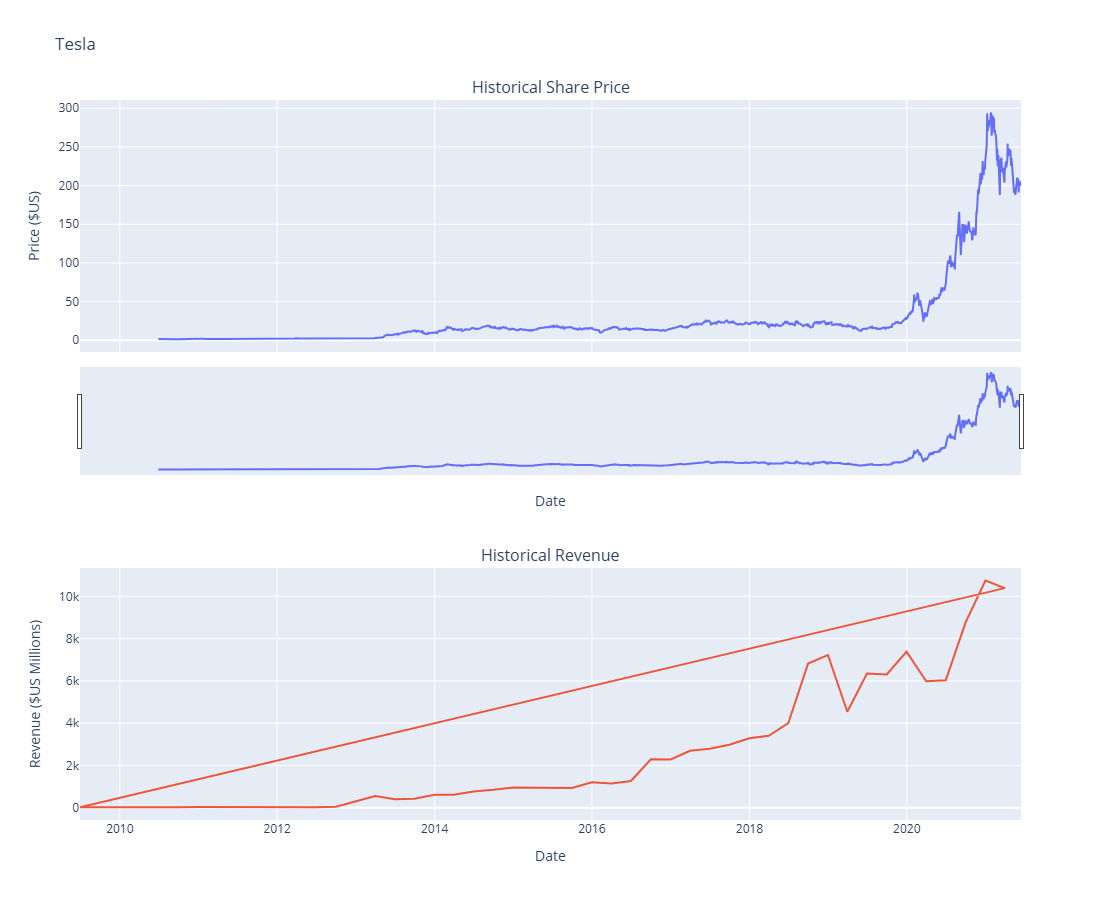

In [191]:
make_graph(tesla_data, Tesla_revenue, 'Tesla')

# Question 6: Plot GameStop Stock Graph

C:\Users\Pouri\AppData\Local\Temp\ipykernel_50720\1537403042.py:9: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Pouri\AppData\Local\Temp\ipykernel_50720\1537403042.py:10: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



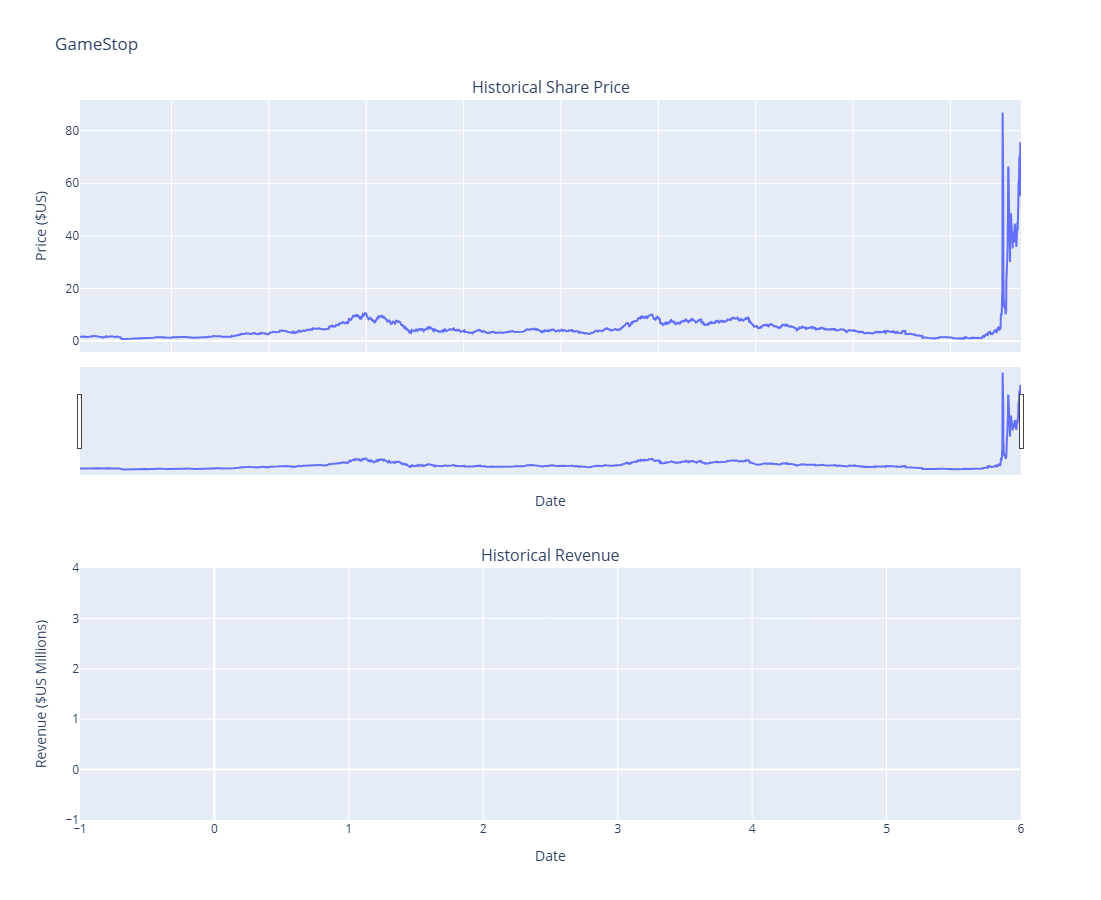

In [193]:
make_graph(